In [2]:
from pylab import *
import stim
import sinter
import os
from typing import List
from scipy.optimize import curve_fit

from functions4 import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
start_d=3; stop_d=5;
circuit = (corner_growing_magic_upd_norep(start_d=start_d, stop_d=stop_d, repeats_small=1) + 
           measure_all_data(stop_d) + observe_logical_top(stop_d) + detector_data(stop_d))
test = stim.Circuit(circuit)
test.diagram("timeslice-html")

<svg viewBox="0 0 3981.56 3307.76"  version="1.1" xmlns="http://www.w3.org/2000/svg">
<g id="qubit_dots">
<circle id="qubit_dot:0:0_0:0" cx="306.274" cy="306.274" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:1:-1_-1:0" cx="261.019" cy="261.019" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:2:1_-1:0" cx="351.529" cy="261.019" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:3:1_1:0" cx="351.529" cy="351.529" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:4:-1_1:0" cx="261.019" cy="351.529" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:5:-2_-2:0" cx="215.764" cy="215.764" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:6:0_-2:0" cx="306.274" cy="215.764" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:7:2_-2:0" cx="396.784" cy="215.764" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:8:2_0:0" cx="396.784" cy="306.274" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:9:2_2:0" cx="396.784" cy="396.784" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:10:0_2:0" cx="306.274" cy="396.784" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:11:-2_2:0" cx="215.764" cy="396.784" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:12:-2_0:0" cx="215.764" cy="306.274" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:13:-3_-3:0" cx="170.51" cy="170.51" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:14:-1_-3:0" cx="261.019" cy="170.51" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:15:1_-3:0" cx="351.529" cy="170.51" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:16:3_-3:0" cx="442.039" cy="170.51" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:17:3_-1:0" cx="442.039" cy="261.019" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:18:3_1:0" cx="442.039" cy="351.529" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:19:3_3:0" cx="442.039" cy="442.039" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:20:1_3:0" cx="351.529" cy="442.039" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:21:-1_3:0" cx="261.019" cy="442.039" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:22:-3_3:0" cx="170.51" cy="442.039" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:23:-3_1:0" cx="170.51" cy="351.529" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:24:-3_-1:0" cx="170.51" cy="261.019" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:25:-4_-4:0" cx="125.255" cy="125.255" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:26:-2_-4:0" cx="215.764" cy="125.255" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:27:0_-4:0" cx="306.274" cy="125.255" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:28:2_-4:0" cx="396.784" cy="125.255" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:29:4_-4:0" cx="487.294" cy="125.255" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:30:4_-2:0" cx="487.294" cy="215.764" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:31:4_0:0" cx="487.294" cy="306.274" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:32:4_2:0" cx="487.294" cy="396.784" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:33:4_4:0" cx="487.294" cy="487.294" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:34:2_4:0" cx="396.784" cy="487.294" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:35:0_4:0" cx="306.274" cy="487.294" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:36:-2_4:0" cx="215.764" cy="487.294" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:37:-4_4:0" cx="125.255" cy="487.294" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:38:-4_2:0" cx="125.255" cy="396.784" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:39:-4_0:0" cx="125.255" cy="306.274" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:40:-4_-2:0" cx="125.255" cy="215.764" r="2" stroke="none" fill="black"/>
<circle id="qubit_dot:41:-5_-5:0" cx="80" cy="80" r="2" stroke=

## Compare to initialization errors

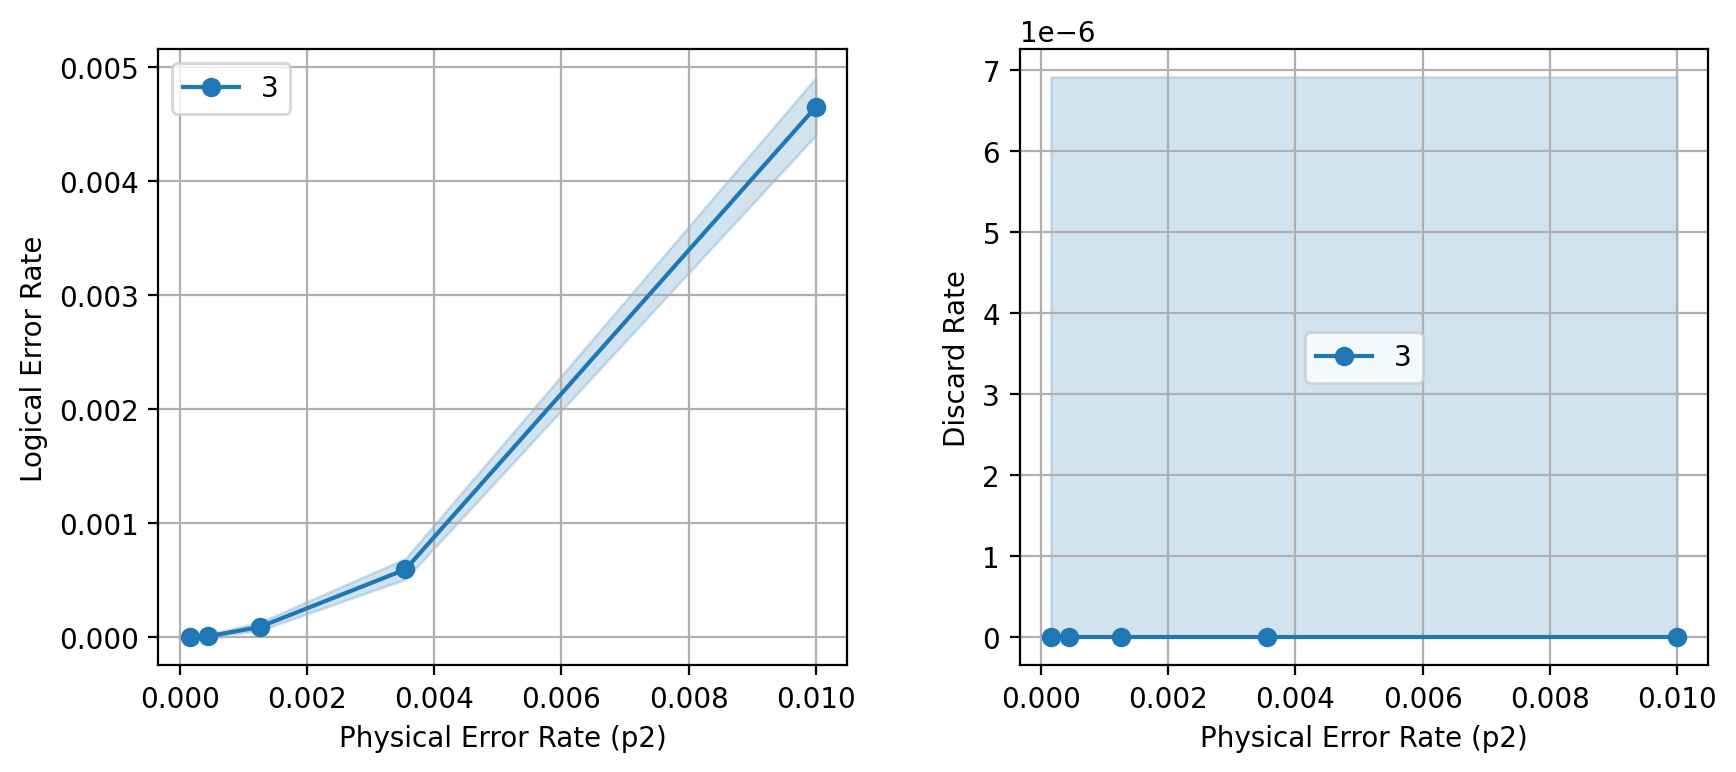

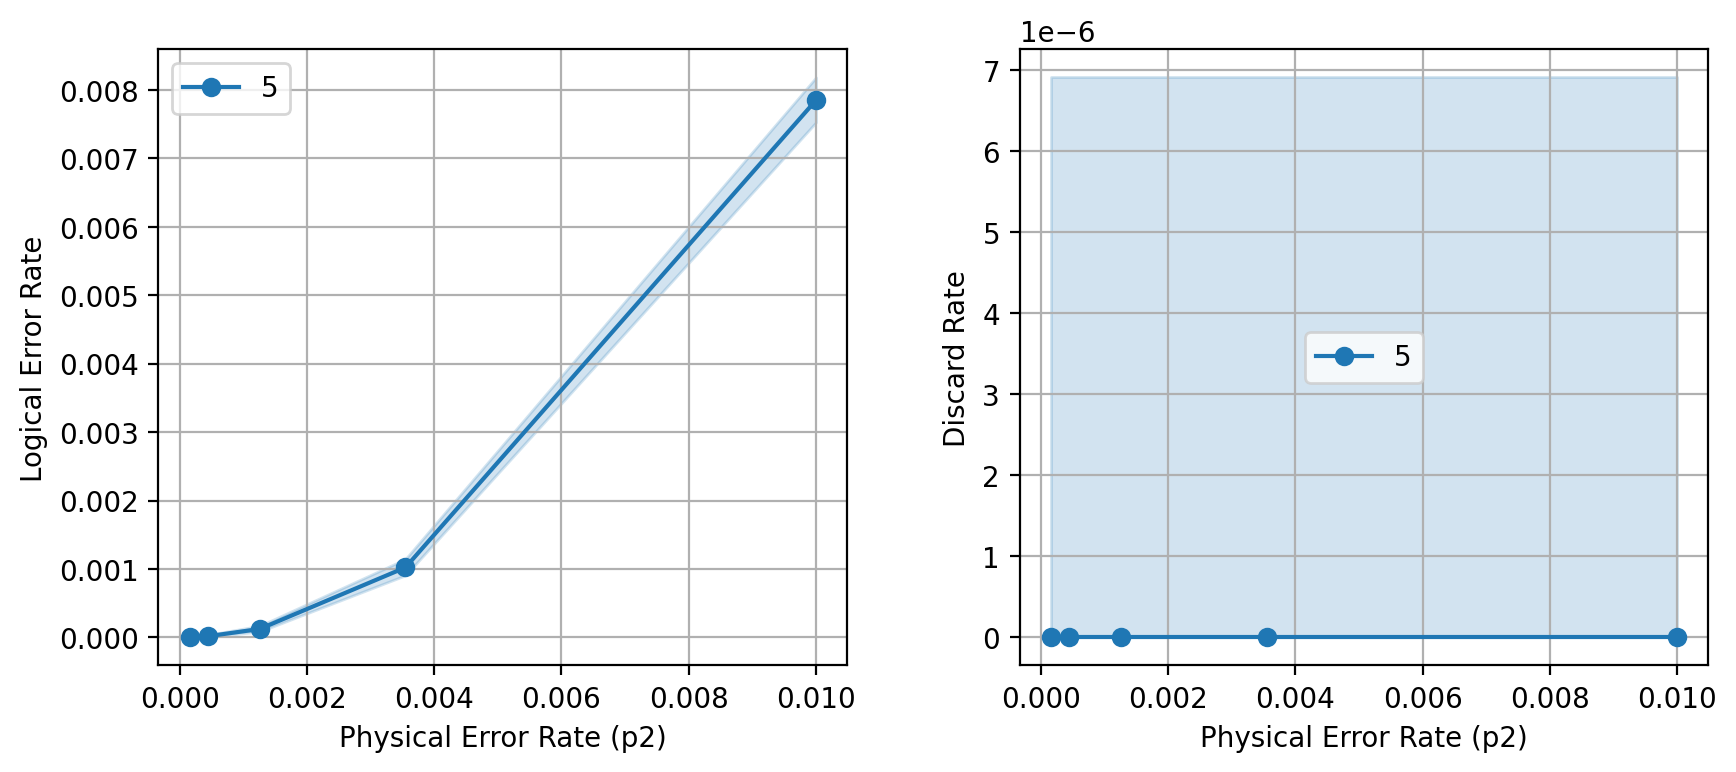

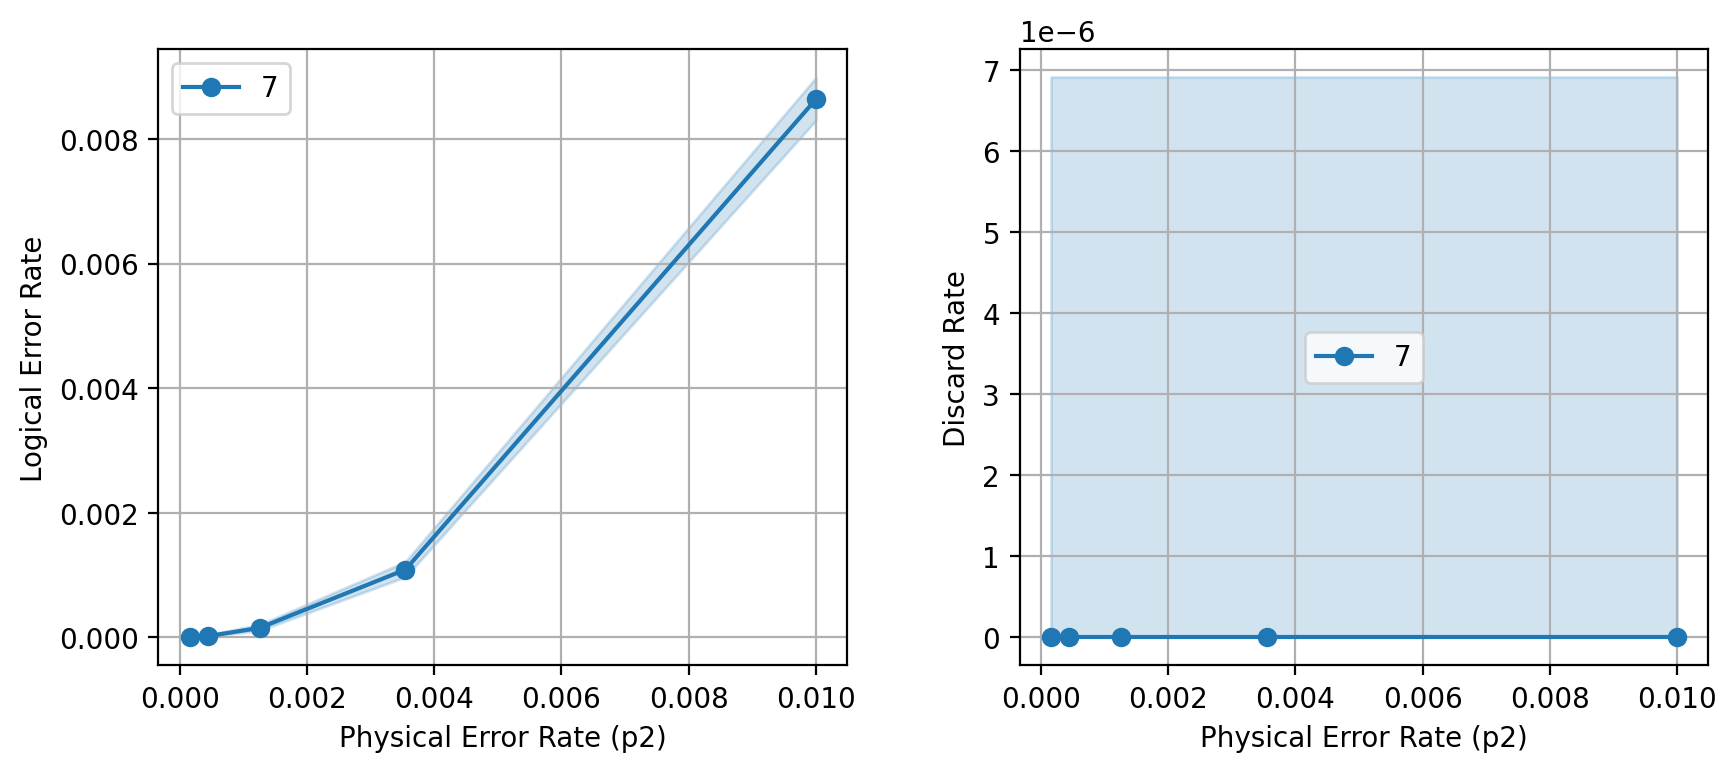

In [39]:
rmax = 3
circuit = d_init_upd_norep(rmax) + measure_all_data(rmax) + observe_logical_from_all(rmax) + detector_data(rmax)
d3_0 = plot_LER_post_v2_nopost_bell_transversal(circuit = circuit, dist=rmax, errs=logspace(-(3.8),-2,5), noise_type='local', magic_err=0e-3)
show()

start_d=3; stop_d=5;
circuit = (corner_growing_magic_upd_norep(start_d=start_d, stop_d=stop_d, repeats_small=1) + 
           measure_all_data(stop_d) + observe_logical_top(stop_d) + detector_data(stop_d))
d3_5 = plot_LER_post_v2_nopost_bell_transversal(circuit = circuit, dist=stop_d, errs=logspace(-(3.8),-2,5), noise_type='local', magic_err=0e-3)
show()

start_d=3; stop_d=7;
circuit = (corner_growing_magic_upd_norep(start_d=start_d, stop_d=stop_d, repeats_small=1) + 
           measure_all_data(stop_d) + observe_logical_top(stop_d) + detector_data(stop_d))
d3_7 = plot_LER_post_v2_nopost_bell_transversal(circuit = circuit, dist=stop_d, errs=logspace(-(3.8),-2,5), noise_type='local', magic_err=0e-3)
show()

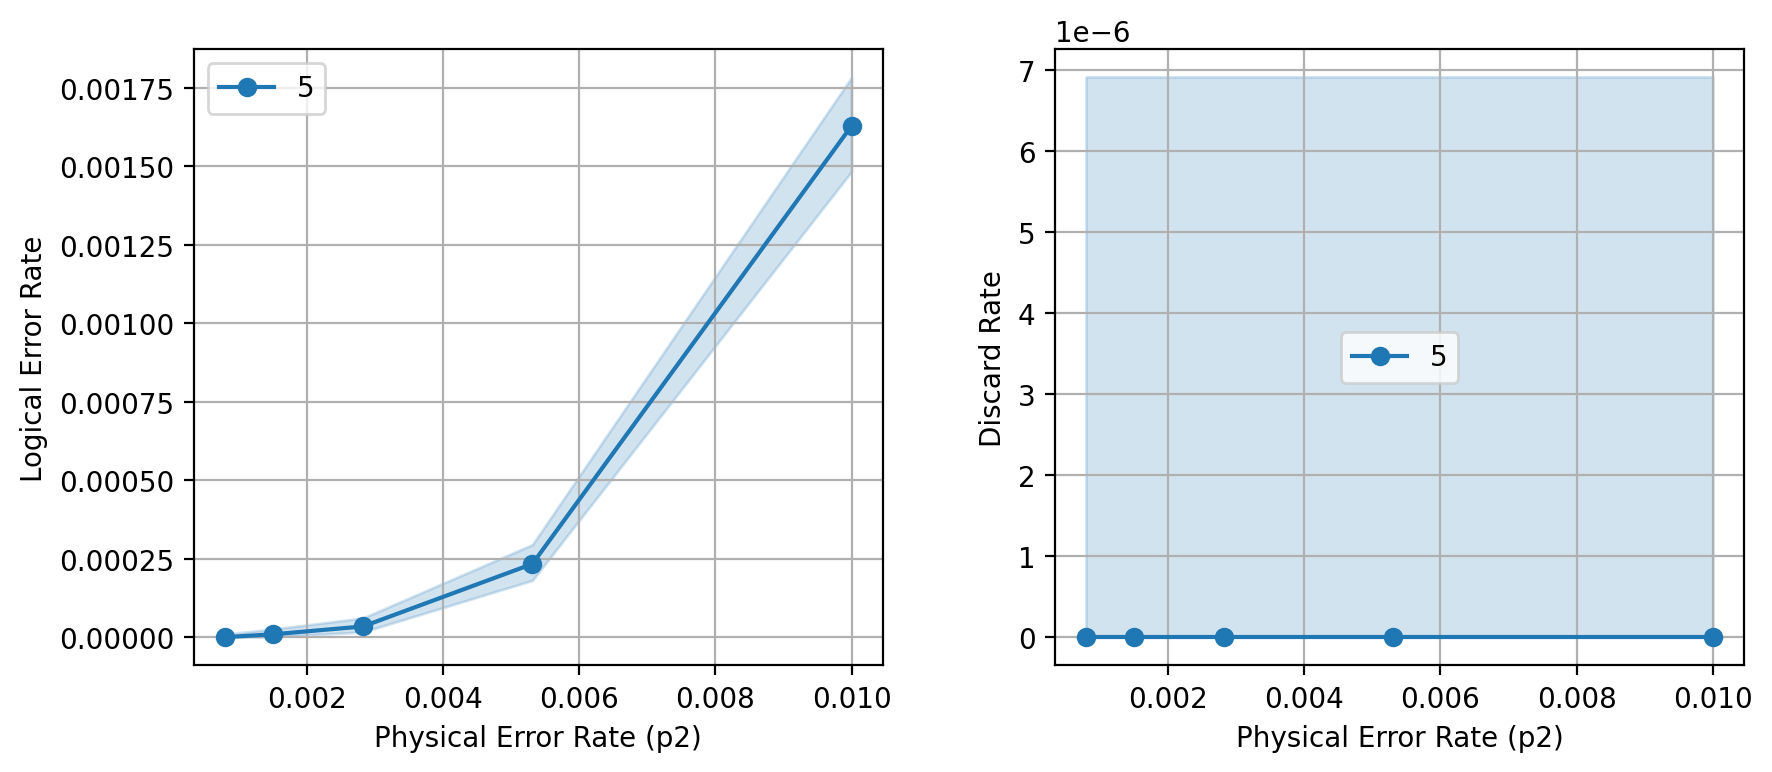

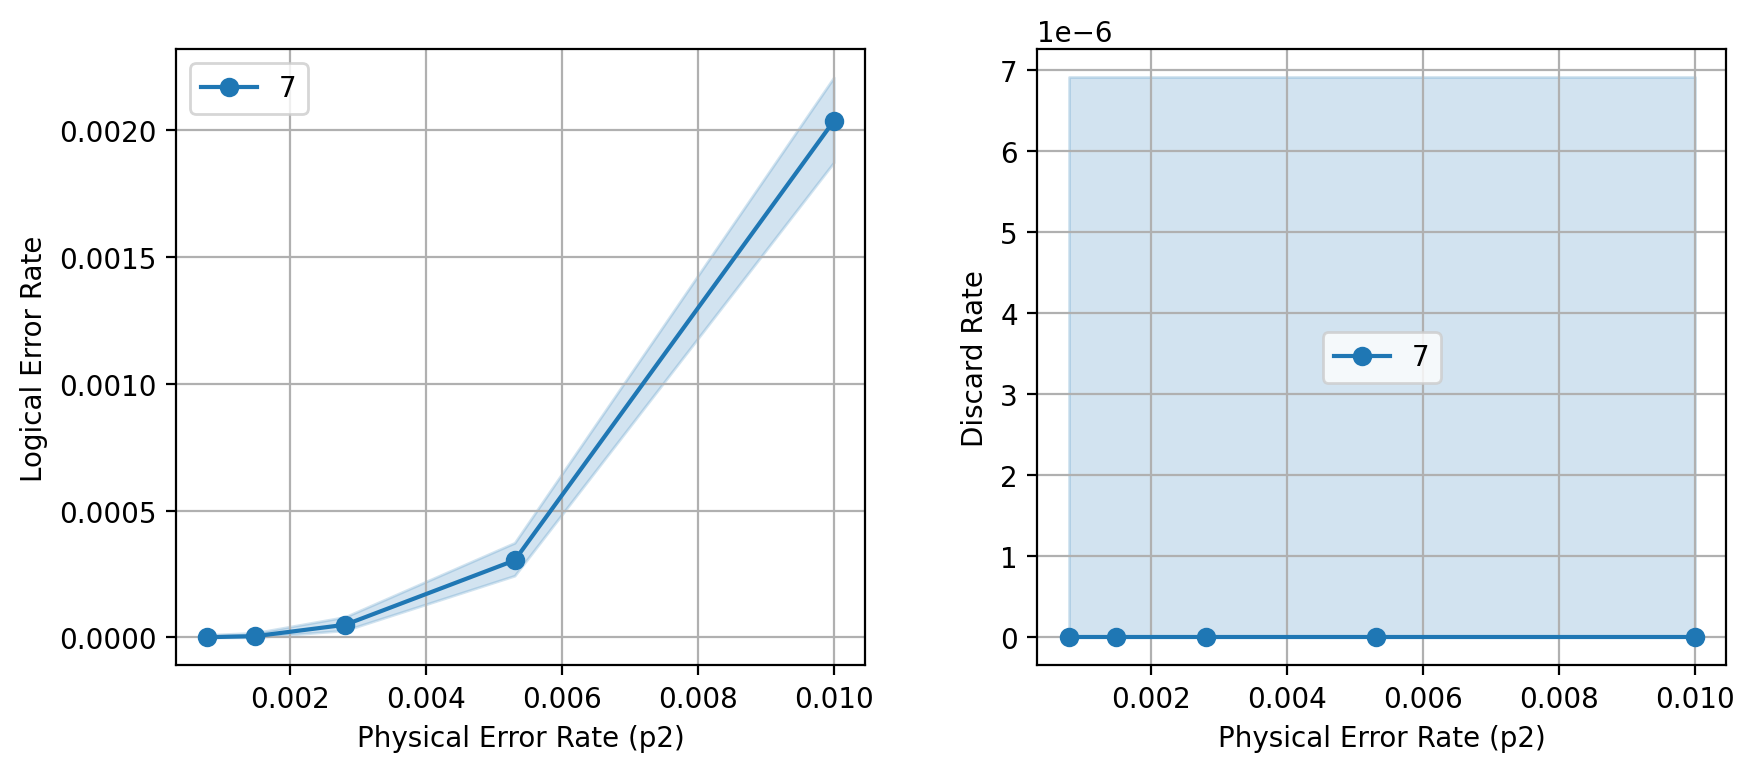

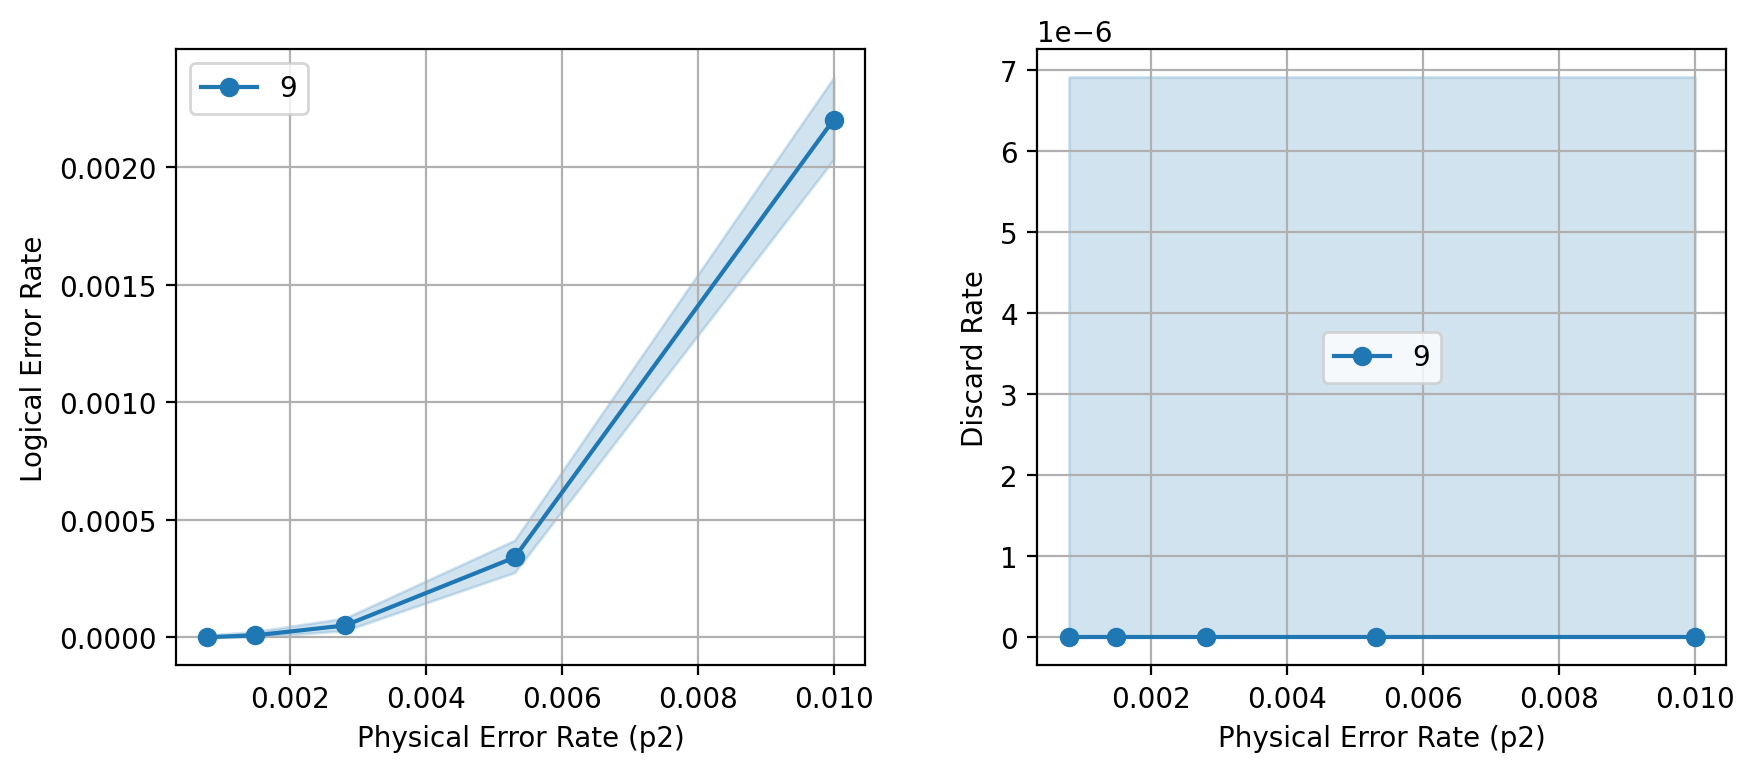

In [40]:
rmax = 5
circuit = d_init_upd_norep(rmax) + measure_all_data(rmax) + observe_logical_from_all(rmax) + detector_data(rmax)
d5_0 = plot_LER_post_v2_nopost_bell_transversal(circuit = circuit, dist=rmax, errs=logspace(-(3.1),-2,5), noise_type='local', magic_err=0e-3)
show()

start_d=5; stop_d=7;
circuit = (corner_growing_magic_upd_norep(start_d=start_d, stop_d=stop_d, repeats_small=1) + 
           measure_all_data(stop_d) + observe_logical_top(stop_d) + detector_data(stop_d))
d5_7 = plot_LER_post_v2_nopost_bell_transversal(circuit = circuit, dist=stop_d, errs=logspace(-(3.1),-2,5), noise_type='local', magic_err=0e-3)
show()

start_d=5; stop_d=9;
circuit = (corner_growing_magic_upd_norep(start_d=start_d, stop_d=stop_d, repeats_small=1) + 
           measure_all_data(stop_d) + observe_logical_top(stop_d) + detector_data(stop_d))
d5_9 = plot_LER_post_v2_nopost_bell_transversal(circuit = circuit, dist=stop_d, errs=logspace(-(3.1),-2,5), noise_type='local', magic_err=0e-3)
show()

In [41]:
arrays = [d3_0,d3_5,d3_7,d5_0,d5_7,d5_9]

In [42]:
data_plot = zeros((6,3,5)) # 6 lines, 3 datas (x, y, yerr), 5 pts

for i in range(6):
    a = arrays[i]
    xdata1 = array(list(map(probs, a)))
    ydata1 = array(list(map(ler, a)))
    yerr1 = array(list(map(ler_err, a)))
    sorted_indices = np.argsort(xdata1)
    xdata1_1 = xdata1[sorted_indices]
    ydata1_1 = ydata1[sorted_indices]    
    yerr1_1 = yerr1[sorted_indices]

    data_plot[i,0] = xdata1_1
    data_plot[i,1] = ydata1_1
    data_plot[i,2] = yerr1_1

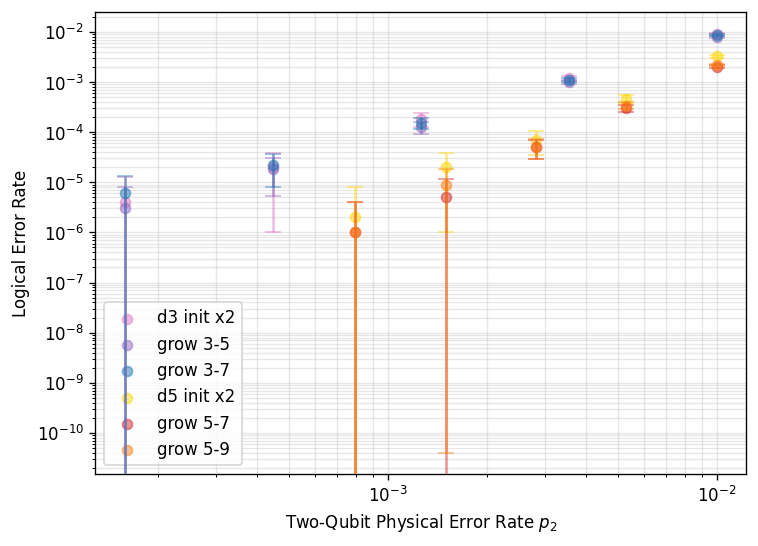

In [44]:
data_plot = np.load('growing_ler_array_1step_init2.npy')
fig, ax = plt.subplots(1, 1, figsize=(7,5))
names = ['d3 init x2','grow 3-5','grow 3-7','d5 init x2','grow 5-7','grow 5-9']
colors = ['C6','C4','C0','gold','C3','C1']
coeffs = [2,1,1,2,1,1]
for i in range(6):
# for i in [0,1]:
    x, y, yerr = data_plot[i]
    ax.scatter(x, coeffs[i]*y, label=names[i], zorder=10, color=colors[i], alpha=0.5)
    ax.errorbar(x, coeffs[i]*y, yerr=coeffs[i]*yerr, zorder=10, color=colors[i], fmt='none', capsize=5, alpha=0.5)

ax.set_xlabel("Two-Qubit Physical Error Rate $p_2$")
ax.set_ylabel("Logical Error Rate")
ax.grid(which='major', alpha=0.3)
ax.grid(which='minor', alpha=0.3)
ax.legend()

# ax.set_ylim(5e-7,3e-2)
ax.loglog()
fig.set_dpi(120)  # Show it bigger
show()
# fig.savefig('grow_scaling_upd.png', transparent=True, dpi=600, bbox_inches='tight')
# fig.savefig('grow_scaling_upd.pdf', transparent=True, dpi=600, bbox_inches='tight')